Import Libraries

In [1]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
import torch #pytorch
import torchvision #pytorch datasets and vision functions
import torchvision.transforms as transforms

import torch.optim as optim


import pandas as pd #for dataframes
import matplotlib.pyplot as plt #for plotting diagrams
import numpy as np #for arrays

from PIL import Image


Load Data

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


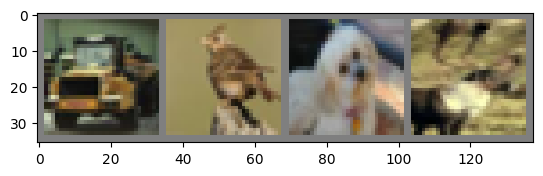

truck bird  dog   deer 


In [3]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

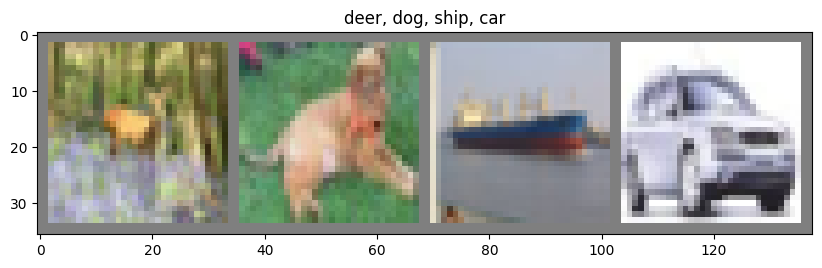

In [4]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
def imshow(img_list, labels):
    fig, ax = plt.subplots(figsize=(10, 5))
    img = torchvision.utils.make_grid(img_list)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    
     # Set title to labels
    title = ', '.join([classes[label] for label in labels])
    ax.set_title(title, fontsize=12)
    plt.show()
imshow(images, labels)

Exploratory Data Analysis

In [5]:
def get_class_distribution(dataloader, dataset_name):
    class_count = {k: 0 for k in classes}
    for _, labels in dataloader:
        for label in labels:
            class_count[classes[label]] += 1
    
    print(f"Class distribution for {dataset_name}:")
    for cls, count in class_count.items():
        print(f"{cls}: {count}")

# Function to get image shape statistics
def get_image_shape(dataloader, dataset_name):
    sample_data, _ = next(iter(dataloader))
    print(f"Image shape statistics for {dataset_name}:")
    print(f"Sample image shape: {sample_data[0].shape}")
    # Add more analysis as needed (e.g., histogram of image sizes)

# Assuming trainloader and testloader are defined elsewhere in your code
get_class_distribution(trainloader, "Training Set")
get_class_distribution(testloader, "Testing Set")
get_image_shape(trainloader, "Training Set")
get_image_shape(testloader, "Testing Set")

Class distribution for Training Set:
plane: 5000
car: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000
Class distribution for Testing Set:
plane: 1000
car: 1000
bird: 1000
cat: 1000
deer: 1000
dog: 1000
frog: 1000
horse: 1000
ship: 1000
truck: 1000
Image shape statistics for Training Set:
Sample image shape: torch.Size([3, 32, 32])
Image shape statistics for Testing Set:
Sample image shape: torch.Size([3, 32, 32])


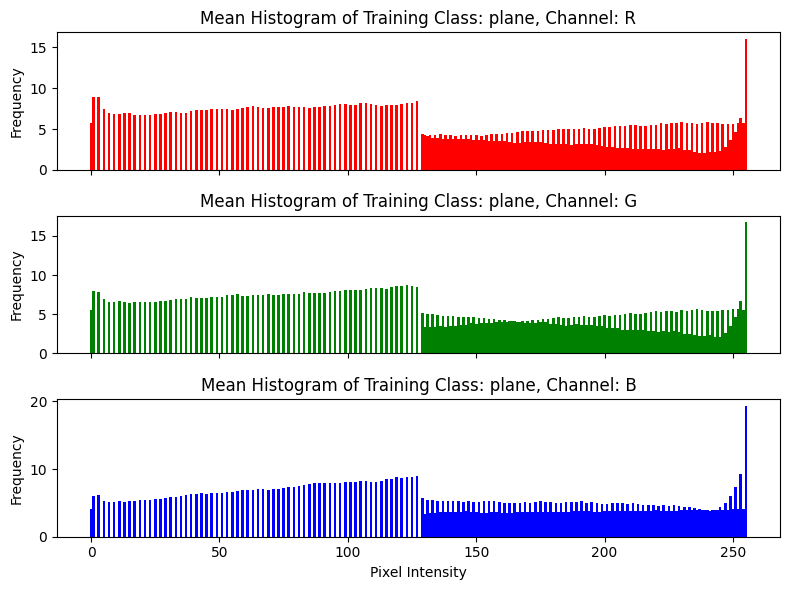

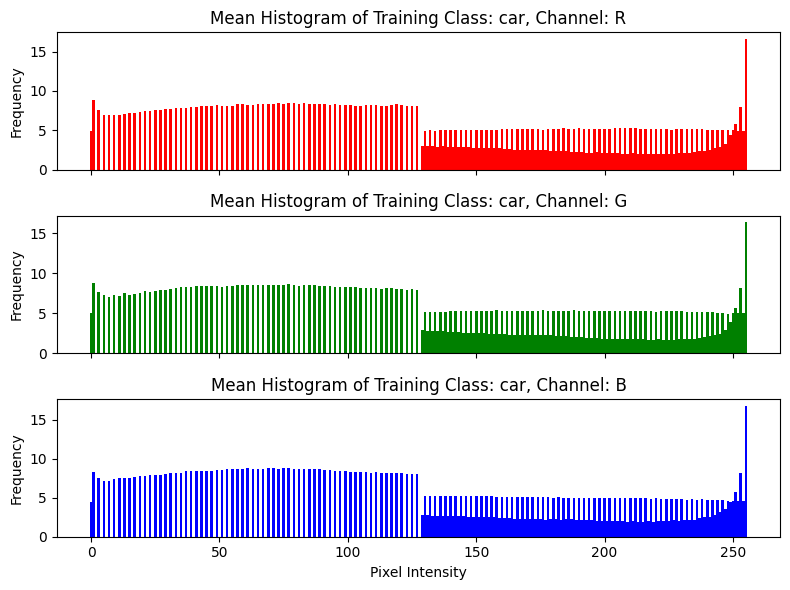

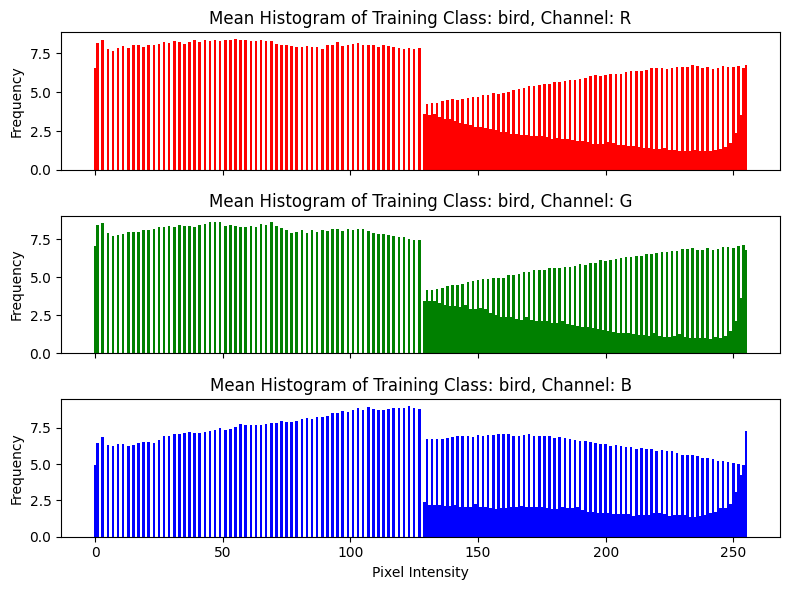

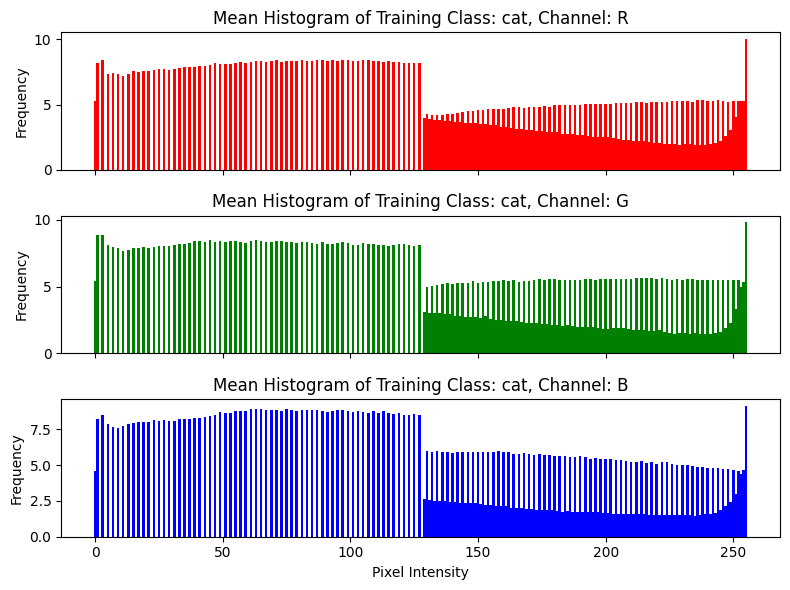

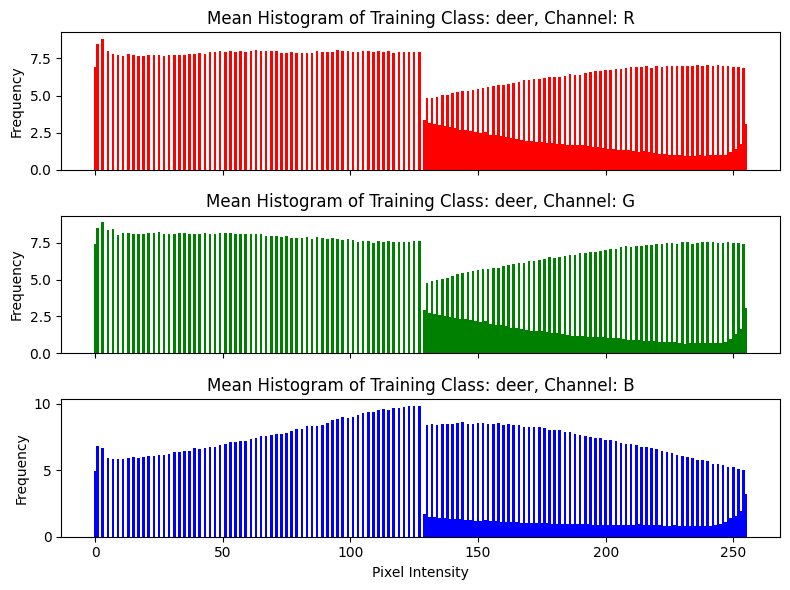

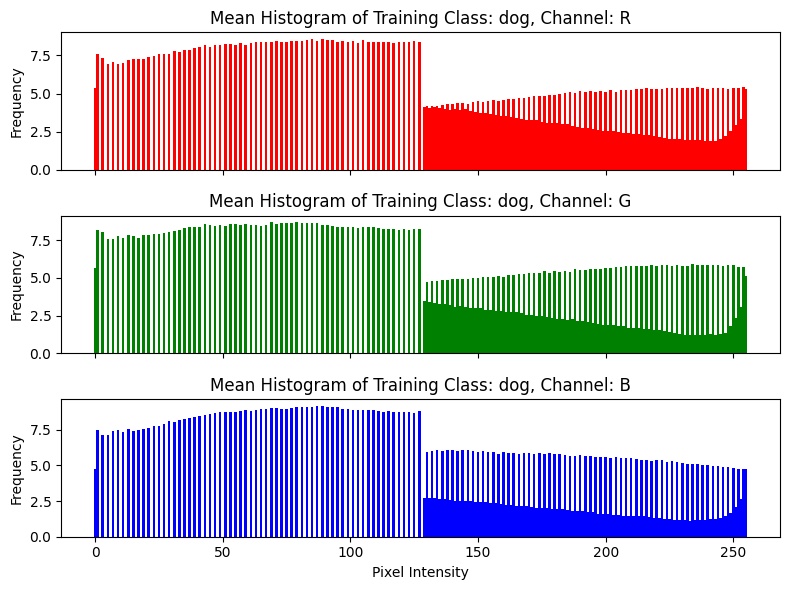

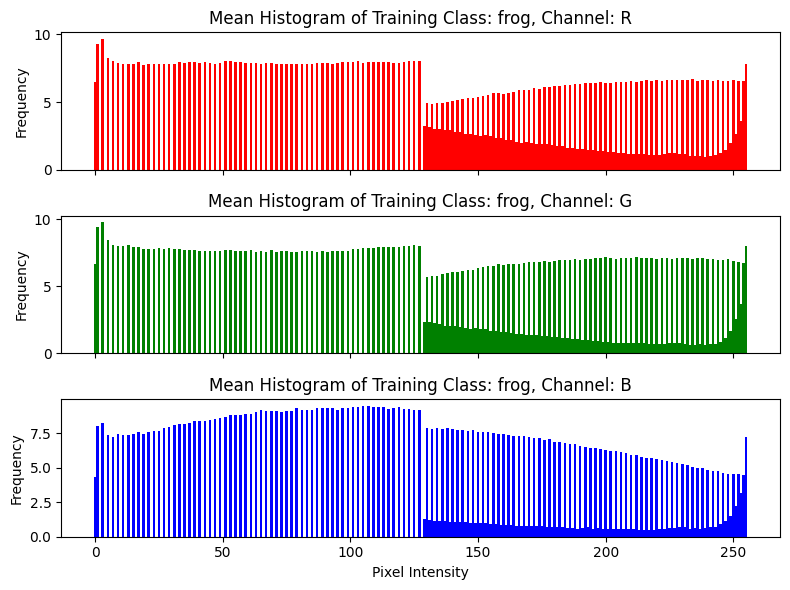

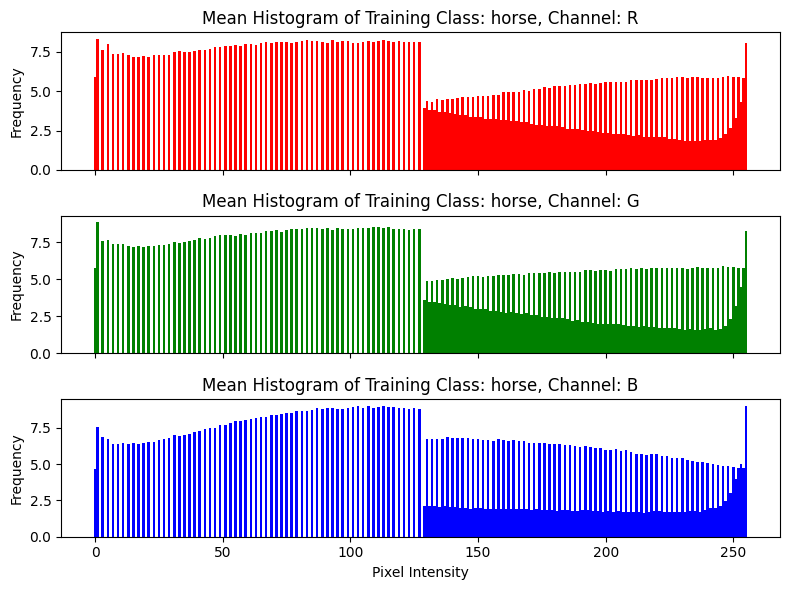

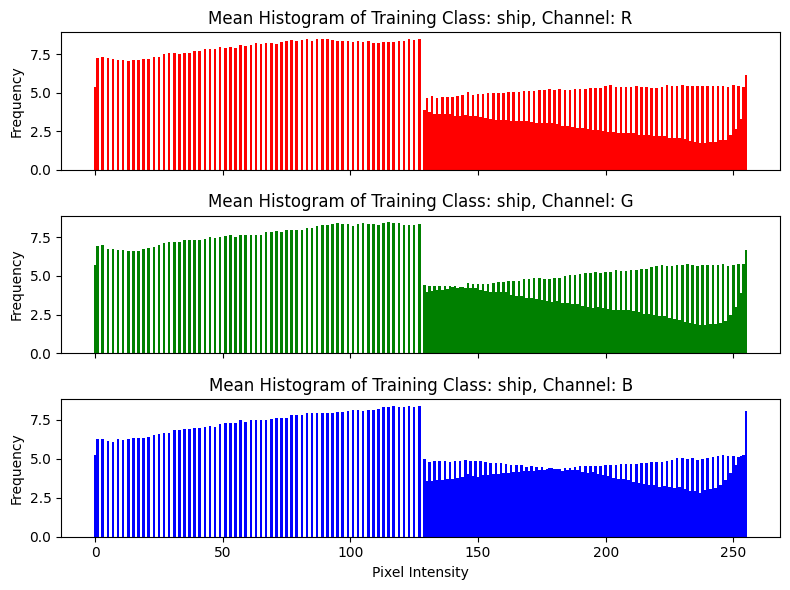

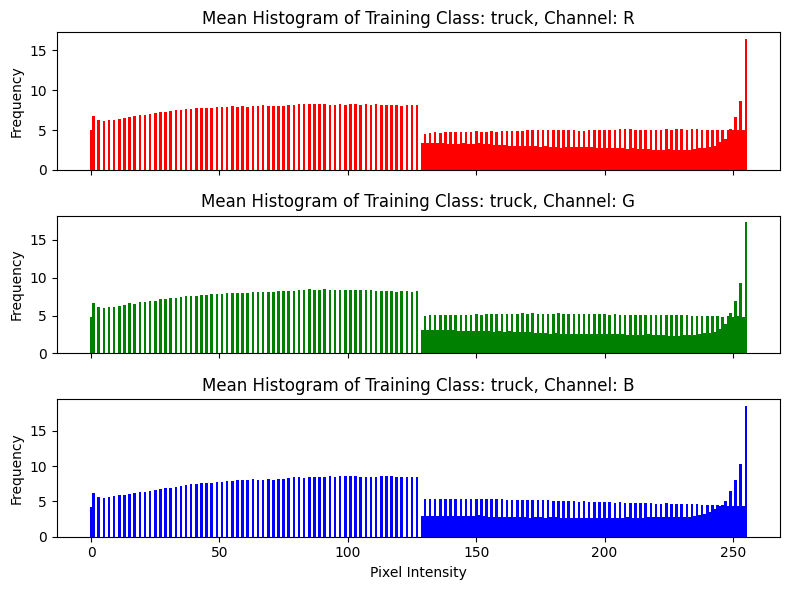

In [6]:
def calculate_pixel_intensity_distribution(trainloader, classes):
    # Initialize dictionaries to store distributions per class and channel
    class_intensity_distributions = {cls: {channel: [] for channel in ['R', 'G', 'B']} for cls in classes}

    # Iterate through batches in trainloader
    for images, labels in trainloader:
        # Assuming images are in range [0, 1], convert to [0, 255] for histogram
        img_array = (images.numpy() * 255).astype(np.uint8)

        # Iterate through images and labels in the batch
        for img, label in zip(img_array, labels):
            # Split the image into RGB channels
            r_channel, g_channel, b_channel = img[0], img[1], img[2]
            
            # Calculate pixel intensity distribution (histogram) for each channel
            r_distribution = np.histogram(r_channel.flatten(), bins=256, range=(0, 256))[0]
            g_distribution = np.histogram(g_channel.flatten(), bins=256, range=(0, 256))[0]
            b_distribution = np.histogram(b_channel.flatten(), bins=256, range=(0, 256))[0]

            # Store the distributions for this image in the class dictionary
            cls_label = classes[label.item()]
            class_intensity_distributions[cls_label]['R'].append(r_distribution)
            class_intensity_distributions[cls_label]['G'].append(g_distribution)
            class_intensity_distributions[cls_label]['B'].append(b_distribution)

    return class_intensity_distributions

# Example usage
intensity_distributions = calculate_pixel_intensity_distribution(trainloader, classes)

# Visualize the distributions for each class and color channel using bar plots
num_channels = 3  # Number of color channels (R, G, B)
bar_colors = {'R': 'red', 'G': 'green', 'B': 'blue'}

# Create separate figures for each group of three subplots
for idx, (cls, channel_distributions) in enumerate(intensity_distributions.items()):
    fig, axs = plt.subplots(num_channels, 1, figsize=(8, 6), sharex=True)

    for ch_idx, (channel, distributions) in enumerate(channel_distributions.items()):
        # Calculate mean distribution across images for the class and channel
        mean_distribution = np.mean(distributions, axis=0)
        bin_edges = np.arange(257)  # 256 bins plus one additional for the rightmost edge
        
        # Plot the bar chart in the appropriate subplot
        axs[ch_idx].bar(bin_edges[:-1], mean_distribution, width=1.0, color=bar_colors[channel])
        axs[ch_idx].set_title(f"Mean Histogram of Training Class: {cls}, Channel: {channel}")
        axs[ch_idx].set_ylabel("Frequency")

    # Set common x-axis label
    axs[-1].set_xlabel("Pixel Intensity")

    plt.tight_layout()
    plt.show()

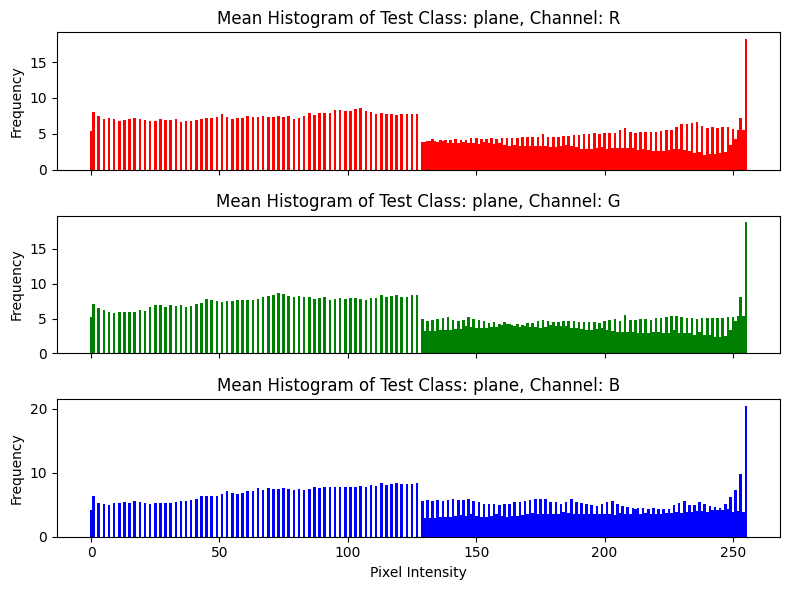

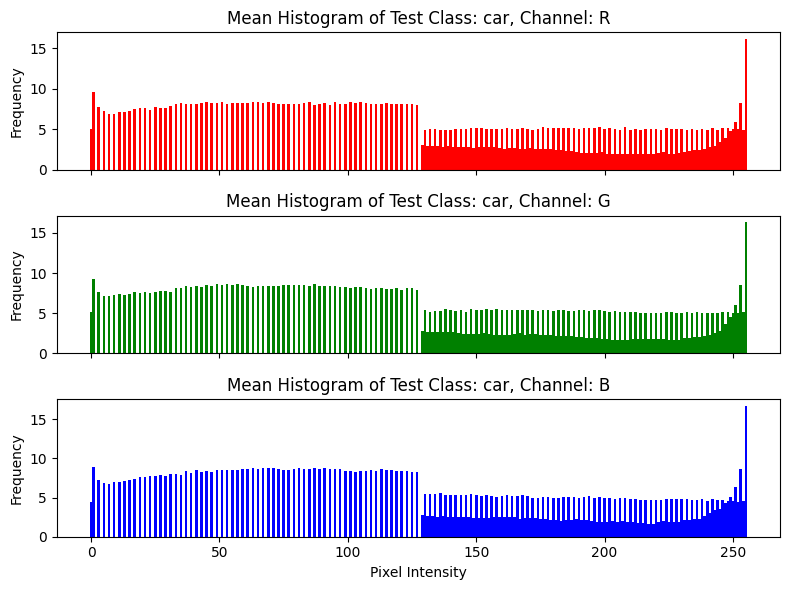

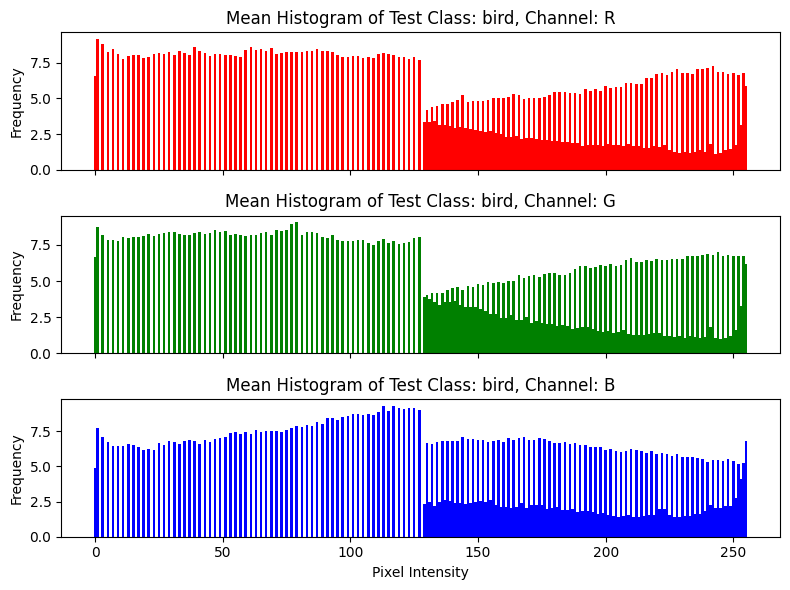

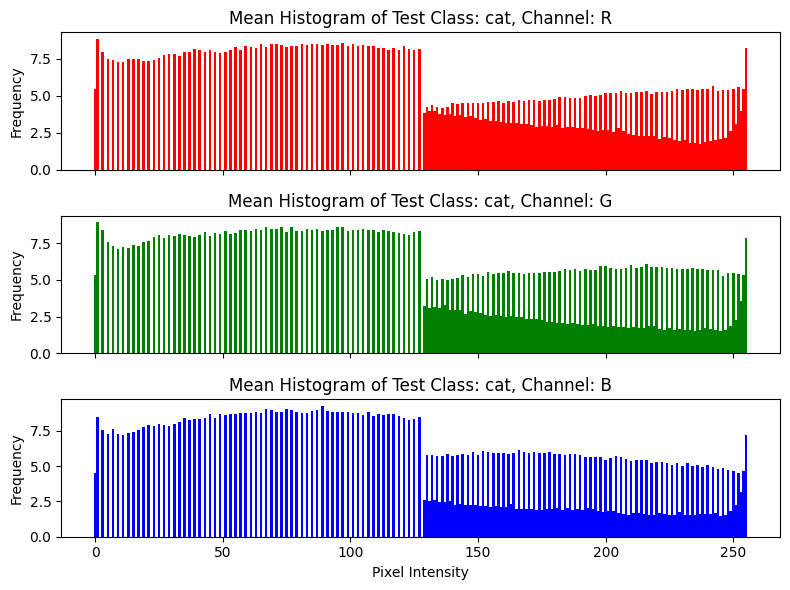

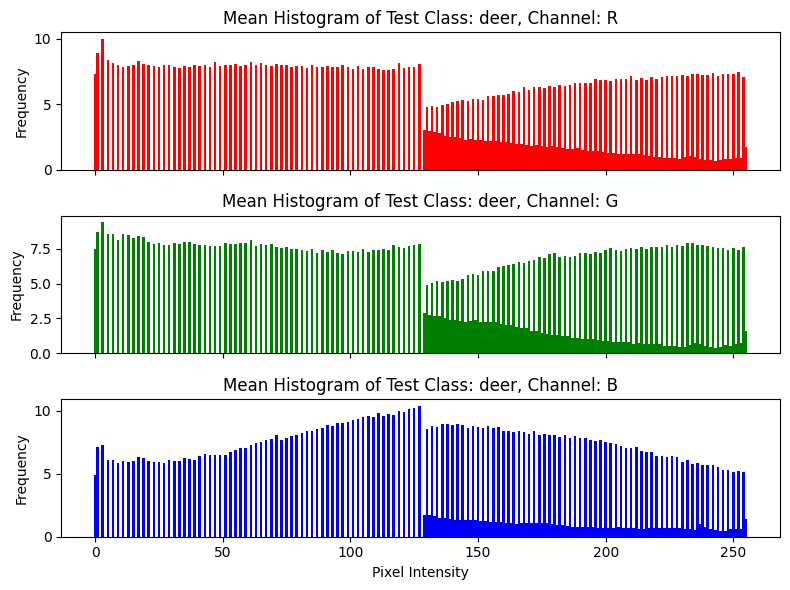

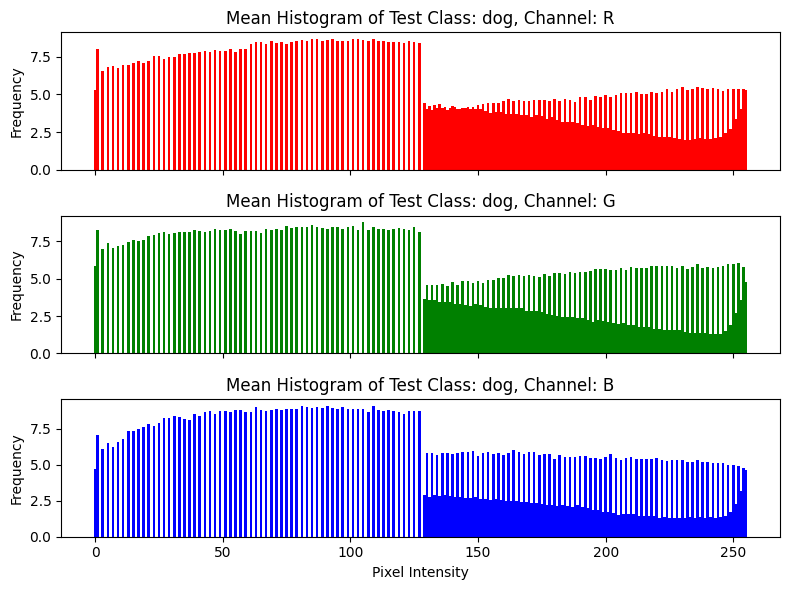

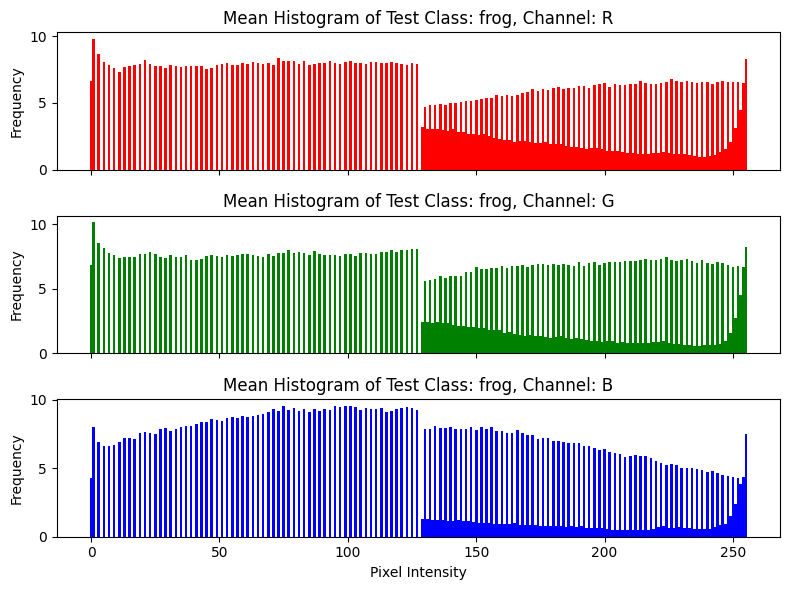

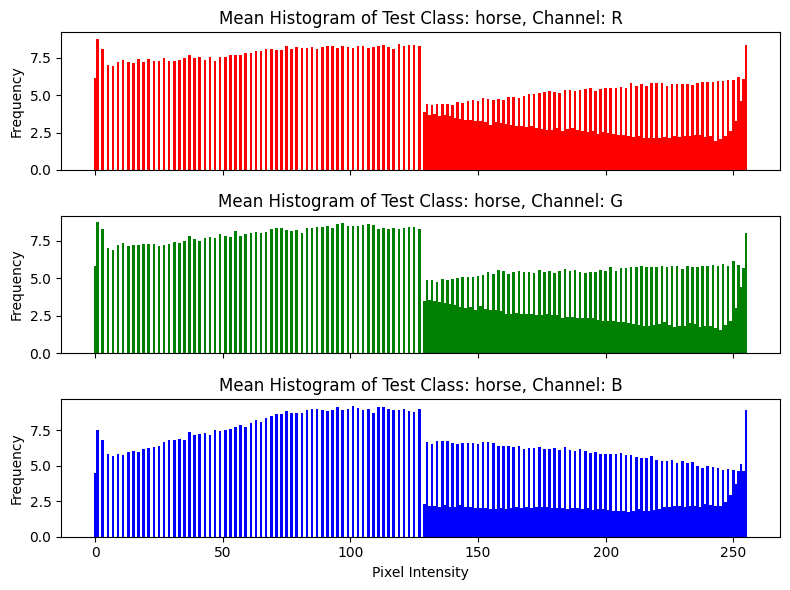

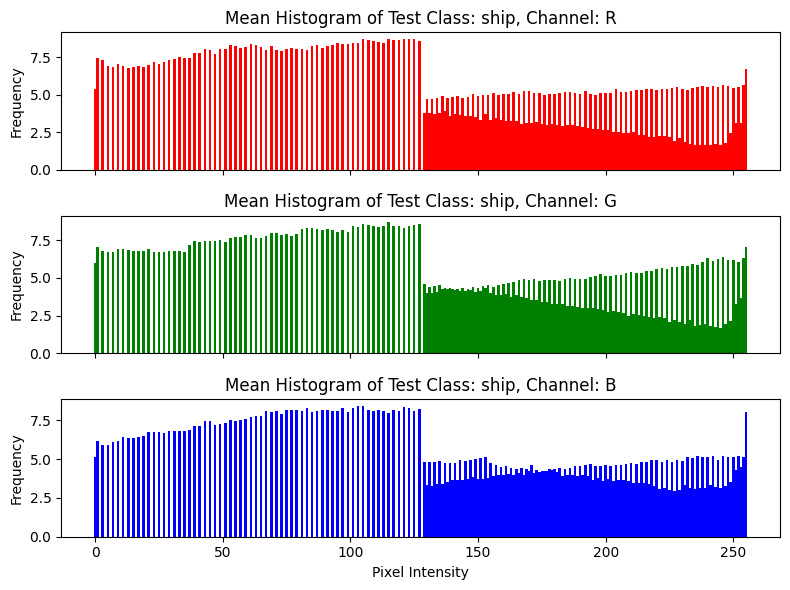

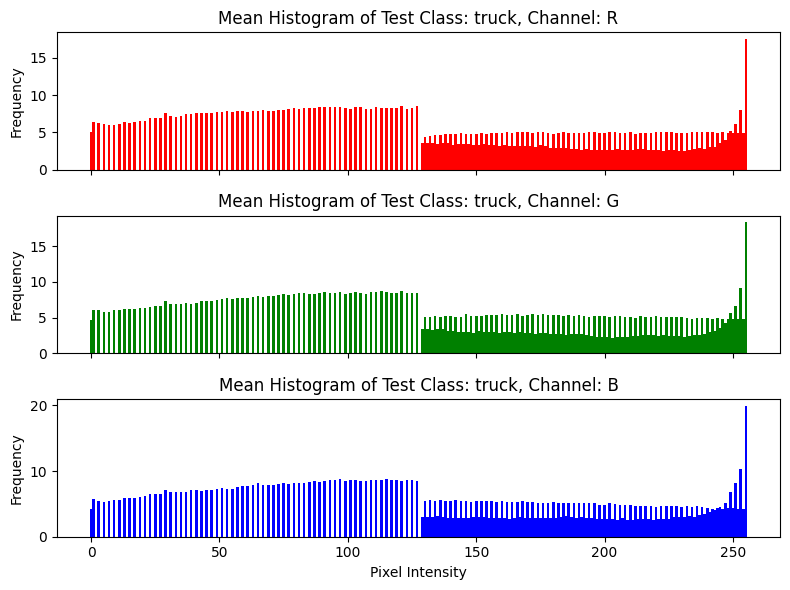

In [7]:
intensity_distributions = calculate_pixel_intensity_distribution(testloader, classes)

# Visualize the distributions for each class and color channel using bar plots
num_channels = 3  # Number of color channels (R, G, B)
bar_colors = {'R': 'red', 'G': 'green', 'B': 'blue'}

# Create separate figures for each group of three subplots
for idx, (cls, channel_distributions) in enumerate(intensity_distributions.items()):
    fig, axs = plt.subplots(num_channels, 1, figsize=(8, 6), sharex=True)

    for ch_idx, (channel, distributions) in enumerate(channel_distributions.items()):
        # Calculate mean distribution across images for the class and channel
        mean_distribution = np.mean(distributions, axis=0)
        bin_edges = np.arange(257)  # 256 bins plus one additional for the rightmost edge
        
        # Plot the bar chart in the appropriate subplot
        axs[ch_idx].bar(bin_edges[:-1], mean_distribution, width=1.0, color=bar_colors[channel])
        axs[ch_idx].set_title(f"Mean Histogram of Test Class: {cls}, Channel: {channel}")
        axs[ch_idx].set_ylabel("Frequency")

    # Set common x-axis label
    axs[-1].set_xlabel("Pixel Intensity")

    plt.tight_layout()
    plt.show()

Tutorial Proof of Concept

In [8]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [9]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
net.train()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

In [18]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [21]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

#Accuracy By Class
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
net.eval()
# again no gradients needed
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy of the network on the 10000 test images: 55 %
Accuracy for class: plane is 54.4 %
Accuracy for class: car   is 46.3 %
Accuracy for class: bird  is 43.3 %
Accuracy for class: cat   is 21.3 %
Accuracy for class: deer  is 62.9 %
Accuracy for class: dog   is 48.0 %
Accuracy for class: frog  is 55.3 %
Accuracy for class: horse is 61.8 %
Accuracy for class: ship  is 77.2 %
Accuracy for class: truck is 83.5 %


In [22]:
net.eval()


correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

#Accuracy By Class
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy of the network on the 10000 test images: 54 %
Accuracy for class: plane is 54.9 %
Accuracy for class: car   is 43.3 %
Accuracy for class: bird  is 43.5 %
Accuracy for class: cat   is 20.7 %
Accuracy for class: deer  is 61.0 %
Accuracy for class: dog   is 48.1 %
Accuracy for class: frog  is 54.1 %
Accuracy for class: horse is 63.3 %
Accuracy for class: ship  is 75.1 %
Accuracy for class: truck is 81.2 %
